### Imports

In [17]:
# Data Processing Modules
import numpy as np
import pandas as pd
# Model Training Modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
# Model Testing Modules
from sklearn import metrics
# Visualization Modules
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

In [18]:
df = pd.read_csv('Data/Portuguese.csv')

In [19]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Prepare Target

<AxesSubplot:>

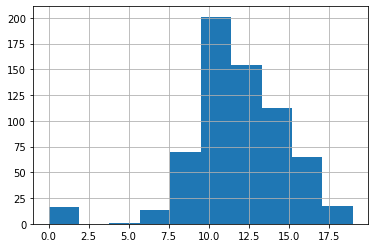

In [20]:
df['G3'].hist()

12.0


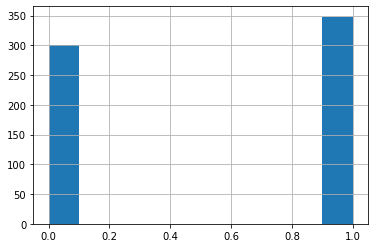

In [21]:
# Create a binary target variable. Is the total grade greater than or equal to the median or not. 
cutoff = df['G3'].median()
print(cutoff)
df['Target'] = (df['G3'] >= cutoff).astype(int)
df['Target'].hist()
df = df.drop(columns=['G1', 'G2', 'G3'])

### Encode Features

In [22]:
# Convert categorical variables to numerical
for feature in df.columns:
    if df[feature].dtype.kind not in 'iufc':
        # Column is not numerical
        df[feature] = df[feature].astype("category")
        df[feature] = df[feature].cat.codes.astype("int")

In [23]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Target
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,4,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,2,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,6,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,0,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,0,1


### Feature Selection

In [24]:
X = df.drop(columns=['Target'])
y = df['Target']

In [25]:
select = SelectKBest(k=15)
X_new = select.fit_transform(X, y)
filt = select.get_support()
features = X.columns

In [26]:
# Print out the top 10 most important features
important_features = features[filt]
print(important_features)

Index(['school', 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'reason',
       'traveltime', 'studytime', 'failures', 'higher', 'internet', 'Dalc',
       'Walc', 'absences'],
      dtype='object')


In [27]:
# Filter data to most important features
X_selected_features = X[important_features]

### Check Statistical Properties of Data

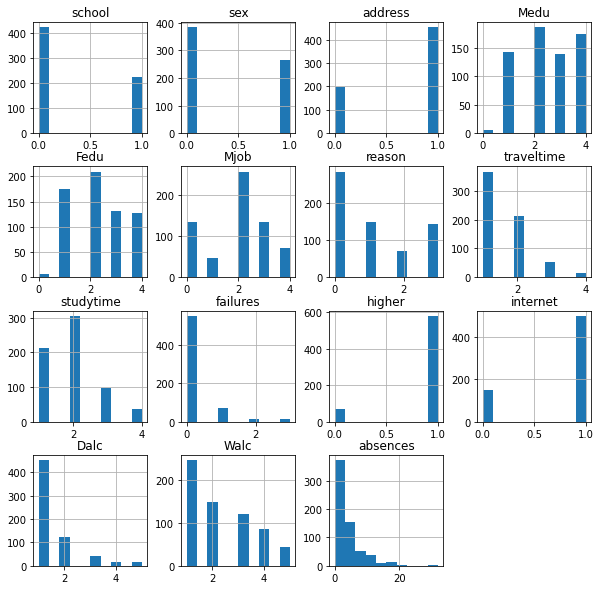

In [28]:
# Plot distributions for each variable used
X_selected_features.hist(figsize=(10,10))
plt.show()

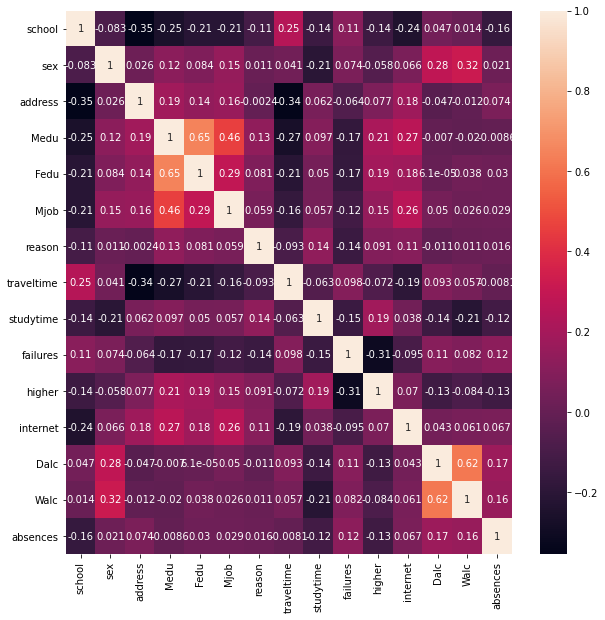

In [29]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_selected_features.corr(), annot=True)
plt.show()

### Split Data into Training and Testing Sets

In [30]:
# Split data into training and testing sets with a 75/25 split
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.25, random_state=5)

In [31]:
print(f"There are {y_test.sum()} students in the test set that are above average")
print(f"There are {len(y_test) - y_test.sum()} students in the test set that are below average")

There are 89 students in the test set that are above average
There are 74 students in the test set that are below average


In [32]:
X_train.to_csv('Data/X_train.csv', index=False)
X_test.to_csv('Data/X_test.csv', index=False)
y_train.to_csv('Data/y_train.csv', index=False)
y_test.to_csv('Data/y_test.csv', index=False)